In [1]:
import cv2

In [8]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')


In [27]:
img = cv2.imread('./test_img/face_detect04.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [28]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [29]:
if len(faces):
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y), (x+w, y+h), (255,255,0),2)

        # 눈
        roi_color = img[y:y+h, x:x+w]
        roi_gray = gray[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        print(eyes)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,255,255),2)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[79 35 33 33]
 [29 36 27 27]]
[[72 23 30 30]
 [22 23 37 37]]


In [9]:
import cv2

# 윤곽선 탐지
src = cv2.imread('../team/images/true_ok/GSY827AN7A1356_AAO11960K_PKT10_CM1EQSUA0012_20220711210457_DirectLight_OK.jpg')
src = cv2.resize(src,(0,0), fx = 0.3, fy = 0.3, interpolation=cv2.INTER_CUBIC)
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
T, src_otsu = cv2.threshold(src, -1, 255, cv2.THRESH_BINARY| cv2.THRESH_OTSU)
hist = cv2.calcHist([src],[0], None, [255],[0,256]) 


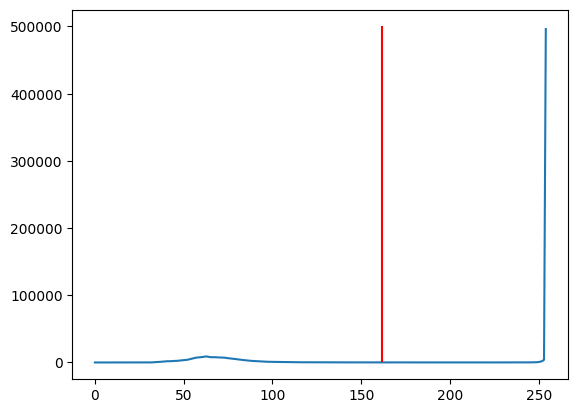

162.0


In [13]:
import matplotlib.pyplot as plt
plt.plot(hist)
plt.vlines(T,0,500000,color = 'red')
plt.show()
print(T)

cv2.imshow('true_ok',src)
cv2.imshow('true_ok_threshold',src_otsu)
cv2.waitKey()
cv2.destroyAllWindows()

In [15]:

ret, binary = cv2.threshold(src, 127, 255, cv2.THRESH_BINARY)
binary = cv2.bitwise_not(binary)

contours, hierachy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

for i in range(len(contours)):
    cv2.drawContours(src, [contours[i]], 0,(0,0,255),2)
    cv2.putText(src, str(i), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0,255,0),1)
    print(i, hierachy[0][i])
    cv2.imshow('src',src)
    cv2.waitKey(0)
cv2.destroyAllWindows()

0 [ 1 -1 -1 -1]
1 [ 2  0 -1 -1]
2 [ 3  1 -1 -1]
3 [ 4  2 -1 -1]
4 [ 5  3 -1 -1]
5 [ 6  4 -1 -1]
6 [ 7  5 -1 -1]
7 [ 8  6 -1 -1]
8 [ 9  7 -1 -1]
9 [10  8 -1 -1]
10 [62  9 11 -1]
11 [12 -1 -1 10]
12 [13 11 -1 10]
13 [14 12 -1 10]
14 [15 13 -1 10]
15 [16 14 -1 10]
16 [17 15 -1 10]
17 [18 16 -1 10]
18 [19 17 -1 10]
19 [20 18 -1 10]
20 [21 19 -1 10]
21 [22 20 -1 10]
22 [23 21 -1 10]
23 [24 22 -1 10]
24 [25 23 -1 10]
25 [26 24 -1 10]
26 [27 25 -1 10]
27 [28 26 -1 10]
28 [29 27 -1 10]
29 [30 28 -1 10]
30 [31 29 -1 10]
31 [32 30 -1 10]
32 [33 31 -1 10]
33 [34 32 -1 10]
34 [35 33 -1 10]
35 [36 34 -1 10]
36 [37 35 -1 10]
37 [38 36 -1 10]
38 [39 37 -1 10]
39 [40 38 -1 10]
40 [41 39 -1 10]
41 [42 40 -1 10]
42 [43 41 -1 10]
43 [44 42 -1 10]
44 [45 43 -1 10]
45 [46 44 -1 10]
46 [47 45 -1 10]
47 [48 46 -1 10]
48 [49 47 -1 10]
49 [50 48 -1 10]
50 [51 49 -1 10]
51 [52 50 -1 10]
52 [53 51 -1 10]
53 [54 52 -1 10]
54 [55 53 -1 10]
55 [56 54 -1 10]
56 [57 55 -1 10]
57 [58 56 -1 10]
58 [59 57 -1 10]
59 [60 

In [16]:
cv2.imshow('binary',binary)
cv2.waitKey()
cv2.destroyAllWindows()